# Social Network Analysis @ UNIPI
## Solution of the Second Midterm  
### 3/6/2019

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Ex. 1: Community Evaluation [6 points]

Given the Golomb graph $\mathcal{G}$, compare the following partitions.

- $[(1,2,3),(4,5,6,7,8,9,10)]$
- $[(1,2,4,5,6),(3,7,8,9,10)]$
- $[(1,2,3,4,8,9),(5,6,7,10)]$

Which partition is best with respect to the modularity score? which for conductance?

In [5]:
g = nx.Graph()

In [6]:
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 1)
g.add_edge(4, 1)
g.add_edge(6, 2)
g.add_edge(8, 3)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 7)
g.add_edge(7, 8)
g.add_edge(8, 9)
g.add_edge(9, 4)
g.add_edge(4, 10)
g.add_edge(5, 10)
g.add_edge(6, 10)
g.add_edge(7, 10)
g.add_edge(8, 10)
g.add_edge(9, 10)

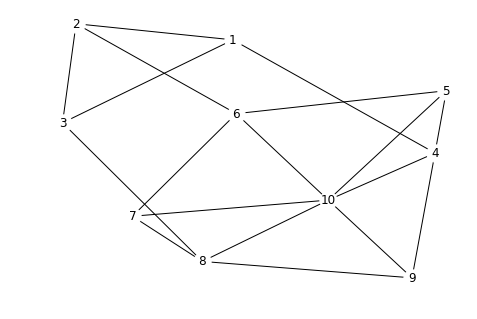

In [8]:
nx.draw_spring(g, with_labels=True, node_color="w")
plt.savefig("net.png")

### Modularity

In [5]:
def modularity(graph, community):
    vc = len(community)
    e = graph.number_of_edges()
    degC = sum([i[1] for i in graph.degree(community)])
    return ((vc/e) - (degC/(2*e)))**2

In [6]:
f"P1 - C1: {modularity(g, [1, 2, 3])} C2: {modularity(g, [4, 5, 6, 7, 8, 9, 10])}"

'P1 - C1: 0.006944444444444446 C2: 0.13040123456790123'

In [7]:
min(modularity(g, [1, 2, 3]), modularity(g, [4, 5, 6, 7, 8, 9, 10]))

0.006944444444444446

In [8]:
f"P2 - C1: {modularity(g, [1, 2, 4, 5, 6])} C2: {modularity(g, [3, 7, 8, 9, 10])}"

'P2 - C1: 0.03780864197530863 C2: 0.0625'

In [9]:
min(modularity(g, [1, 2, 4, 5, 6]), modularity(g, [3, 7, 8, 9, 10]))

0.03780864197530863

In [10]:
f"P3 - C1: {modularity(g, [1, 2, 3, 4, 8, 9])} C2: {modularity(g, [5, 6, 7, 10])}"

'P3 - C1: 0.049382716049382734 C2: 0.04938271604938271'

In [11]:
min(modularity(g, [1, 2, 3, 4, 8, 9]), modularity(g, [5, 6, 7, 10]))

0.04938271604938271

#### Best Partition (Modularity): P3

In [12]:
max(0.006944444444444446, 0.03780864197530863, 0.04938271604938271)

0.04938271604938271

### Conductance

In [13]:
def conductance(graph, community):
    gs = nx.subgraph(graph, community)
    ec = gs.number_of_edges()
    eoc = sum([len(list(graph.neighbors(u)))-len(list(gs.neighbors(u))) for u in community])
    return (2*eoc)/((2*ec)+eoc)

In [14]:
f"P1 - C1: {conductance(g, [1, 2, 3])} C2: {conductance(g, [4, 5, 6, 7, 8, 9, 10])}"

'P1 - C1: 0.6666666666666666 C2: 0.2222222222222222'

In [15]:
max(conductance(g, [1, 2, 3]), conductance(g, [4, 5, 6, 7, 8, 9, 10]))

0.6666666666666666

In [16]:
f"P2 - C1: {conductance(g, [1, 2, 4, 5, 6])} C2: {conductance(g, [3, 7, 8, 9, 10])}"

'P2 - C1: 0.8235294117647058 C2: 0.7368421052631579'

In [17]:
max(conductance(g, [1, 2, 4, 5, 6]), conductance(g, [3, 7, 8, 9, 10]))

0.8235294117647058

In [18]:
f"P3 - C1: {conductance(g, [1, 2, 3, 4, 8, 9])} C2: {conductance(g, [5, 6, 7, 10])}"

'P3 - C1: 0.6 C2: 0.75'

In [19]:
max(conductance(g, [1, 2, 3, 4, 8, 9]), conductance(g, [5, 6, 7, 10]))

0.75

#### Best partition (conductance): P1

In [20]:
min(0.6666666666666666, 0.8235294117647058, 0.75)

0.6666666666666666

## Ex. 2: Community Discovery [4 points]

Given Golomb graph $\mathcal{G}$, compute its communities applying k-clique for k=3,4.

On the obtained partitions evaluate the coverage and internal edge density.

In [21]:
from networkx.algorithms.community import k_clique_communities

k3 = list(k_clique_communities(g, 3))
k3 # complete coverage

[frozenset({4, 5, 6, 7, 8, 9, 10}), frozenset({1, 2, 3})]

In [22]:
list(k_clique_communities(g, 4)) # empty coverage

[]

### Internal Edge Density

In [23]:
def ied(graph, community):
    sg = nx.subgraph(graph, community)
    ec = sg.number_of_edges()
    vc = sg.number_of_nodes()
    return (2*ec)/(vc*(vc-1))

In [24]:
ed = []
for com in k3:
    
    ed.append(ied(g, com))
min(ed)

0.5714285714285714

## Es 3: Threshold Model [8 points]

Given the Golomb graph $\mathcal{G}$, applying the threshold model considering the following scenarios:

- S1
    - Set of initial infected nodes: I = {10}
    - Node threshold $\tau = \frac{1}{3}$
- S2
    - Set of initial infected nodes: I = {1}
    - Node threshold at iteration $t$ $\tau_t = \frac{1}{2+t}$
  
Consider a node infected at time $t$ iff at least $\tau\%$ of its neighbors were already infected at $t-1$.

### S1

In [25]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [10])

# Setting node parameters
threshold = 1/3
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(5)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [10]
Iteration: 1 Infected: [5, 7, 9]
Iteration: 2 Infected: [4, 6, 8]
Iteration: 3 Infected: [1, 2, 3]
Iteration: 4 Infected: []


In [26]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [1])

model.set_initial_status(config)

for t in range(5):
    # threshold update
    threshold = 1/(2+t)
    for i in g.nodes():
        config.add_node_configuration("threshold", i, threshold)

    it = model.iteration()
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [1]
Iteration: 1 Infected: [2, 3]
Iteration: 2 Infected: [4, 6, 8]
Iteration: 3 Infected: [5, 7, 9, 10]
Iteration: 4 Infected: []


## Ex. 4: Link Prediction [8 points]

Given the Golomb graph $\mathcal{G}$:
- remove all edges in the set $T=[(2,6),(4,5),(7,10),(4,10)]$;
- compute for them the Jaccard, AdamicAdar and Preferential Attachment scores;
- rank the obtained predictions for decreasing likelihood.
Are there missing edges outside T that produce higher predictive scores? If so, provide an example for each measure.

In [27]:
g.remove_edges_from([(2, 6), (4, 5), (7, 10), (4, 10)])

### Jaccard

In [28]:
res = list(nx.jaccard_coefficient(g, [(2, 6), (4, 5), (7, 10), (4, 10)]))
sorted(res, key=lambda x: -x[2])

[(7, 10, 0.5), (4, 10, 0.2), (2, 6, 0.0), (4, 5, 0.0)]

In [29]:
sorted(list(nx.jaccard_coefficient(g)), key=lambda x: -x[2])[0] # edge with maximum jaccard

(7, 10, 0.5)

### Adamic Adar

In [30]:
res = list(nx.adamic_adar_index(g, [(2, 6), (4, 5), (7, 10), (4, 10)]))
sorted(res, key=lambda x: -x[2])

[(7, 10, 1.631586747071319), (4, 10, 0.9102392266268373), (2, 6, 0), (4, 5, 0)]

In [31]:
sorted(list(nx.adamic_adar_index(g)), key=lambda x: -x[2])[0] # edge with maximum adamic adar-

(6, 8, 2.164042561333445)

### Preferential Attachment

In [32]:
res = list(nx.preferential_attachment(g, [(2, 6), (4, 5), (7, 10), (4, 10)]))
sorted(res, key=lambda x: -x[2])

[(7, 10, 8), (4, 10, 8), (2, 6, 6), (4, 5, 4)]

In [33]:
sorted(list(nx.preferential_attachment(g)), key=lambda x: -x[2])[0] # edge with maximum preferential attachment

(1, 8, 12)

## Ex. 5: Multiple choice questions [4 points]
Identify the correct answer(s), among the proposed ones, for the following questions:
    
**Q1:** Which among the following network analysis tasks is known to be *ill-posed*?
   - Link Prediction
   - Network Diffusion
   - **Community Discovery**
   - Network Resilience
   
**Q2:** Given two sets of communities, under which assumptions the Normalized Mutual Information (NMI) score can be used to compare them? 
   - **Crisp partition & complete node coverage**
   - Overlapping partition & complete node coverage
   - Crisp partition
   - Overlapping partition
   
**Q3:** Considering the stochastic diffusion models discussed in class (SI, SIS, SIR), and assuming a graph composed by a single component, the likelihood of reaching a pandemic state relates to which factors?
   - Network topology
   - Infection seeds
   - **Model parameters**
   - None of the above
   
**Q4:** Given a diffisive process unfolding over a network which strategies can be used to stop/reduce its spreading?
   - Intra-community edge deletion
   - **Inter-community edge deletion**
   - **Immunization (removal) of hubs**
   - Immunization (removal) of hubs connected prevalently to a single community 

## Ex. 6: Open Question [2 points]
Briefly discuss the *Theseus Ship Paradox* and its implication in Dynamic Community Doscovery.

### Complete answer

The Theseus Ship Paradox refers to the question of identity preservation along time, which arises in particular in case of continued slow evolution of communities. 

It is originally an ancient thought experiment introduced by Plutarch about the identity of an object evolving through time. It can be formulated as follows:

Let's consider a famous ship, the *Ship of Theseus*, composed of planks, and kept in a harbor as historical artifact. As time passes, some planks deteriorate and need to be replaced by new ones. After a long enough period, all the original planks of the ship have been replaced. Can we consider the ship in the harbor to still be  *the same* ship of Theseus? If not, at which point exactly did it ceased to be the same ship?

Another aspect of the problem arises if we add a second part to the story. Let's consider that the removed planks were stored in a warehouse, cleaned, and that a new ship, identical to the original one, is built with them. Should this ship, just built out, be considered as the *real* ship of Theseus, because it is composed of the same elements? 


Let's call the original ship $A$, the ship that is in the harbor after all replacements $B$, and the reconstructed from original pieces, $C$.  In terms of dynamic community detection, this scenario can be modeled by a slowly evolving community $c_1$ ($c_1= A$), from which nodes are removed one after the others, until all of them have been replaced ($c_1=B$). A new community $c_2$ appearing after that, composed of the same nodes as the original community ($c_2= C$).

A static algorithm analyzing the state of the network at every step would be able to discover that there is, at each step, a community ($c_1$, slowly evolving), and, at the end of the experiment, two communities ($c_1$ and $c_2$). But the whole point of dynamic community detection is to yield a longitudinal description, and therefore, to decide when two ships at different points in time are *the same* or not.
